# 二元分類

In [1]:
#載入必要套件
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=np.array([cmap(idx)]),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# 載入Iris資料

In [2]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([1,2])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1


# 切割資料為training以及testing data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

# Tree base model 不需要做特徵標準化


In [4]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
#criterion 可選'entropy' or 'gini'
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [7]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [8]:
tree.predict(X_test)

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 2])

In [9]:
y_test['target'].values

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2])

In [10]:
error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['target'].values[i]:
        print(i,v, y_test['target'].values[i])
        error+=1
print("錯誤次數: ", error)
print("準確度(accuracy): ", (len(X_test)-error)/len(X_test))

14 2 1
16 2 1
18 2 1
23 1 2
錯誤次數:  4
準確度(accuracy):  0.8666666666666667


In [11]:
# accuracy
tree.score(X_test,y_test['target'])

0.8666666666666667

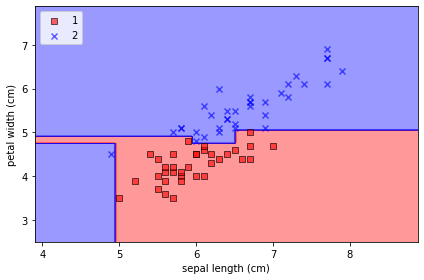

In [12]:
# show training data
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

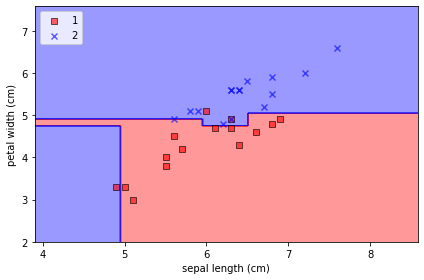

In [13]:
# show testing data
plot_decision_regions(X_test.values, y_test['target'].values, classifier=tree)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 評估decision tree model表現

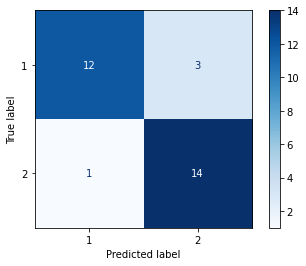

In [14]:
plot_confusion_matrix(tree, X_test.values, y_test['target'].values, cmap=plt.cm.Blues)

## Precision, Recall, F1 score

In [15]:
print(classification_report(y_test['target'].values, tree.predict(X_test.values)))

              precision    recall  f1-score   support

           1       0.92      0.80      0.86        15
           2       0.82      0.93      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



## PR曲線

In [16]:
from sklearn.metrics import plot_precision_recall_curve

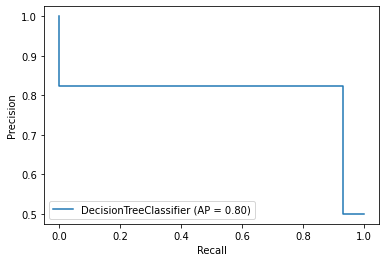

In [17]:
disp = plot_precision_recall_curve(tree, X_test.values, y_test['target'].values)


## AUC

In [18]:
from sklearn.metrics import plot_roc_curve

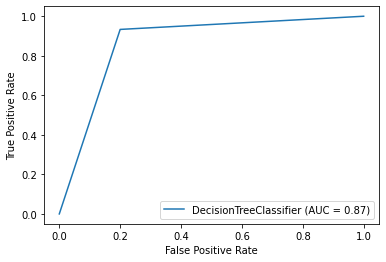

In [19]:
disp = plot_roc_curve(tree, X_test.values, y_test['target'].values)


# 視覺化輸出樹的模型

In [20]:
from sklearn.tree import export_graphviz

In [21]:
export_graphviz(tree, out_file='tree.dot', feature_names=['sepal length (cm)','petal length (cm)'])

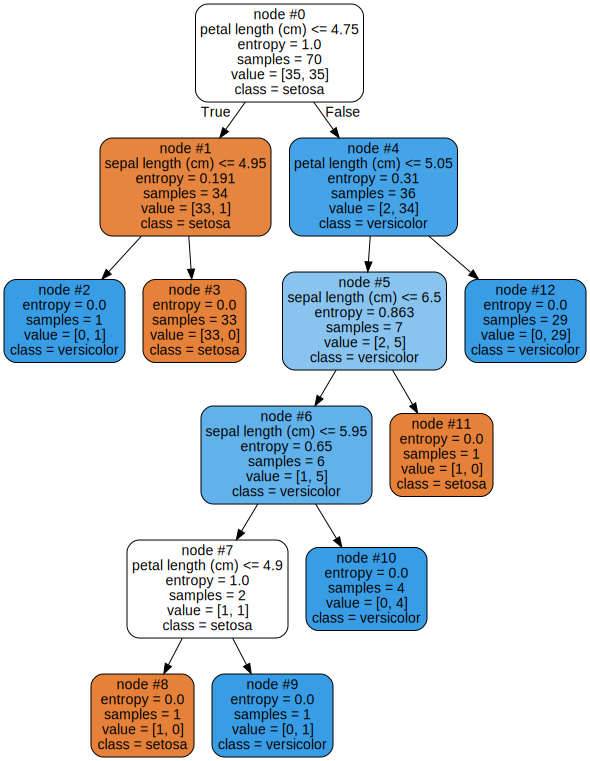

In [22]:
#不同顏色代表不同類別，顏色深度越淺說明各個類別的混雜程度高，顏色越深說明純度越高

import graphviz
dot_data = export_graphviz(tree,
                           out_file=None, 
                           node_ids = True, 
                           feature_names=['sepal length (cm)','petal length (cm)'], 
                           proportion = False, 
                           filled = True, 
                           rounded = True,
                           class_names = iris['target_names']
                           )
graph = graphviz.Source(dot_data)
graph

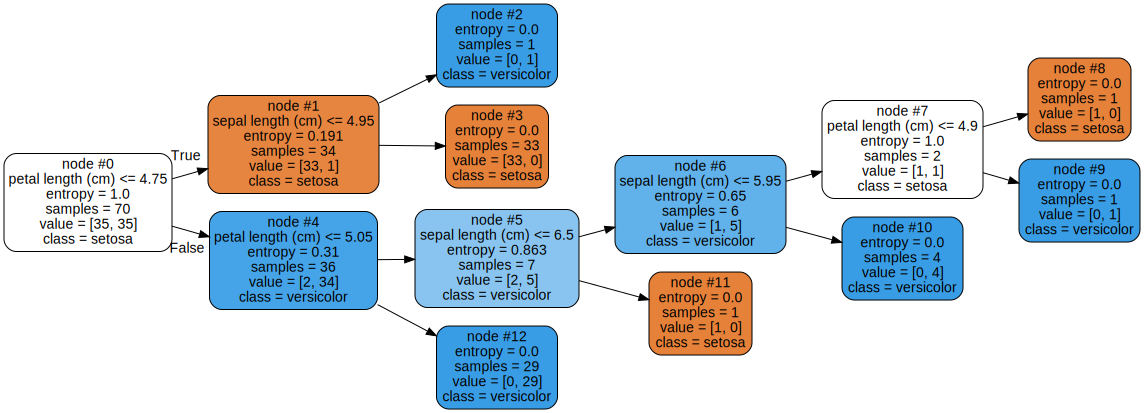

In [23]:
dot_data = export_graphviz(tree,
                           out_file=None, 
                           node_ids = True, 
                           feature_names=['sepal length (cm)','petal length (cm)'], 
                           proportion = False, 
                           filled = True, 
                           rounded = True,
                           class_names = iris['target_names'],
                           rotate = True
                           )
graph = graphviz.Source(dot_data)
graph

In [24]:
# 看樹葉位置
print(X_test.values[:3])
tree.apply(X_test.values)


[[6.8 4.8]
 [6.3 5.6]
 [6.9 4.9]]


array([11, 12, 11, 12, 12, 12,  3, 10, 12, 12, 12, 12, 12,  3,  2,  3, 10,
        3, 12,  3,  3, 12,  3,  8,  3,  3,  3, 12, 12, 10])

In [25]:
y_test['target'].values, tree.predict(X_test.values)

(array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 2, 1, 1, 1, 2, 2, 2]),
 array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
        1, 1, 1, 1, 1, 2, 2, 2]))

In [26]:
from sklearn.tree import export_text
r = export_text(tree, feature_names=['sepal length (cm)','petal length (cm)'], show_weights=True)
print(r)

|--- petal length (cm) <= 4.75
|   |--- sepal length (cm) <= 4.95
|   |   |--- weights: [0.00, 1.00] class: 2
|   |--- sepal length (cm) >  4.95
|   |   |--- weights: [33.00, 0.00] class: 1
|--- petal length (cm) >  4.75
|   |--- petal length (cm) <= 5.05
|   |   |--- sepal length (cm) <= 6.50
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- petal length (cm) <= 4.90
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 1
|   |   |   |   |--- petal length (cm) >  4.90
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 2
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- weights: [0.00, 4.00] class: 2
|   |   |--- sepal length (cm) >  6.50
|   |   |   |--- weights: [1.00, 0.00] class: 1
|   |--- petal length (cm) >  5.05
|   |   |--- weights: [0.00, 29.00] class: 2



In [27]:
# 輸出成檔案 (可用vscode + dotplugin看)
dot_data = export_graphviz(tree,
                           out_file="tree.dot", 
                           node_ids = True, 
                           feature_names=['sepal length (cm)','petal length (cm)'], 
                           proportion = False, 
                           filled = True, 
                           rounded = True,
                           class_names = iris['target_names']
                           )

# 多元分類

In [28]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['petal width (cm)','petal length (cm)','target']]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,petal width (cm),petal length (cm),target
0,0.2,1.4,0
1,0.2,1.4,0
2,0.2,1.3,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

# Decision Tree 實作

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

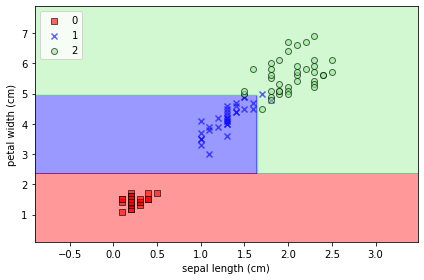

In [31]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

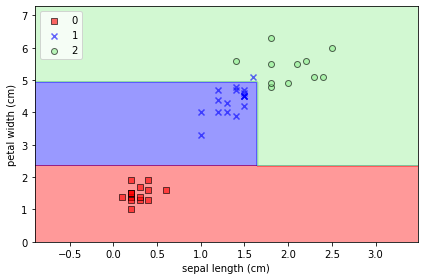

In [32]:
plot_decision_regions(X_test.values, y_test['target'].values, classifier=tree)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

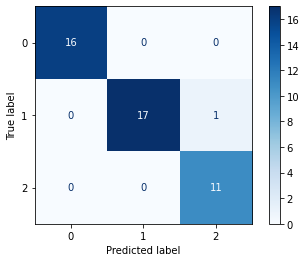

In [33]:
plot_confusion_matrix(tree, X_test.values, y_test['target'].values, cmap=plt.cm.Blues)

# 練習5分鐘 自己視覺化樹

In [34]:
export_graphviz(tree, out_file='tree2.dot', feature_names=['sepal length (cm)','petal length (cm)'])

#  RandomForest 實作

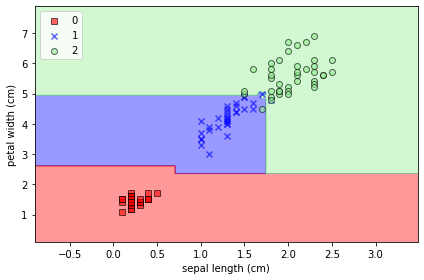

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=10,random_state=3,n_jobs=2,max_features=2)
forest.fit(X_train,y_train['target'].values)
plot_decision_regions(X_train.values, y_train['target'].values, classifier=forest)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

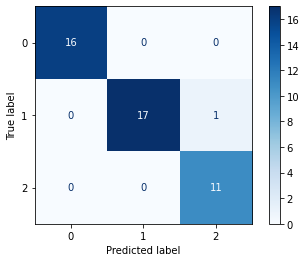

In [36]:
plot_confusion_matrix(forest, X_test.values, y_test['target'].values, cmap=plt.cm.Blues)

In [37]:
export_graphviz(forest.estimators_[5], out_file='forest.dot', feature_names=['sepal length (cm)','petal length (cm)'])

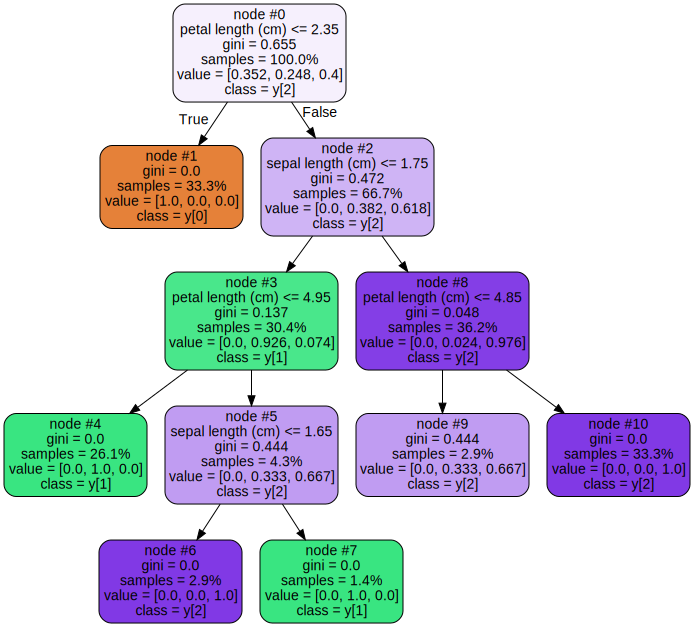

In [38]:
dot_data = export_graphviz(forest.estimators_[5],out_file=None, 
                           node_ids = True, 
                           feature_names=['sepal length (cm)','petal length (cm)'], 
                           proportion = True, 
                           class_names = True, 
                           filled = True, 
                           rounded = True)
graph = graphviz.Source(dot_data)
graph


# GBDT 實作

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbdt = GradientBoostingClassifier(n_estimators=10,random_state=3)

In [41]:
gbdt.fit(X_train,y_train['target'].values)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

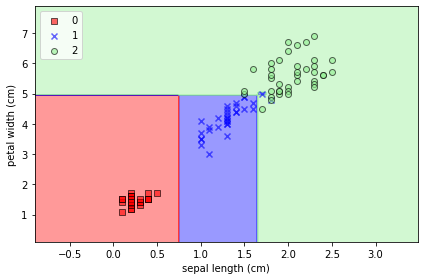

In [42]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=gbdt)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

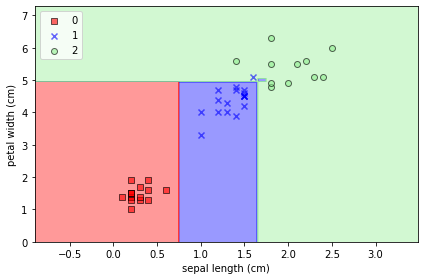

In [43]:
plot_decision_regions(X_test.values, y_test['target'].values, classifier=gbdt)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
len(gbdt.estimators_)

10

In [45]:
gbdt.estimators_[5]

array([DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7F7F109BB570,
                      splitter='best'),
       DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7F7F109BB570,
                      splitter='best'),
       DecisionTreeRegressor(ccp_alpha=0.0, criterion='fri

In [46]:
gbdt.estimators_[5, 0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7F7F109BB570,
                      splitter='best')

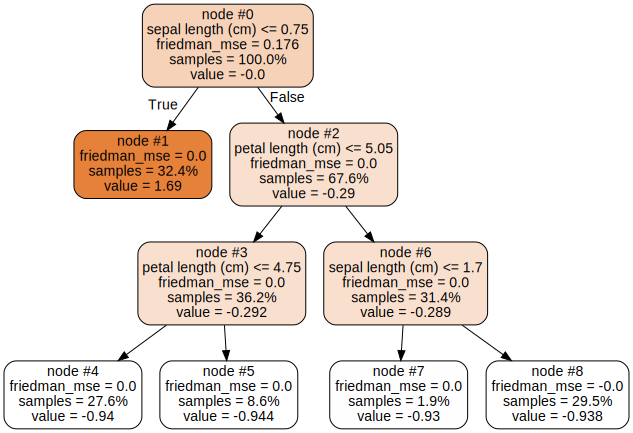

In [47]:
# 回歸樹 
dot_data = export_graphviz(gbdt.estimators_[1, 0],
                           out_file=None, 
                           node_ids = True, 
                           feature_names=['sepal length (cm)','petal length (cm)'], 
                           proportion = True, 
                           class_names = iris['target_names'], 
                           filled = True, 
                           rounded = True)
graph = graphviz.Source(dot_data)
graph



In [48]:
gbdt.predict(X_test.values)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

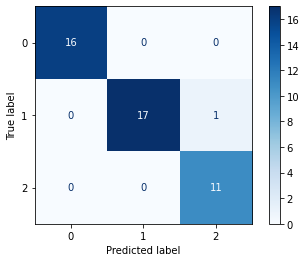

In [49]:
plot_confusion_matrix(gbdt, X_test.values, y_test['target'].values, cmap=plt.cm.Blues)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test['target'].values, gbdt.predict(X_test.values)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



要在OS先安裝graphviz：    
    Mac(terminal):   
        /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install.sh)"   
        brew install graphviz    
    Windows:   
        https://graphviz.gitlab.io/_pages/Download/Download_windows.html    

把dot檔轉成圖檔：

1. dot -Tpng tree.dot -o tree.png
2. pip install graphviz直接在jupyter看        
3. 用VS code 裝 dotplugin看
4. 線上小工具 https://dreampuf.github.io/GraphvizOnline/


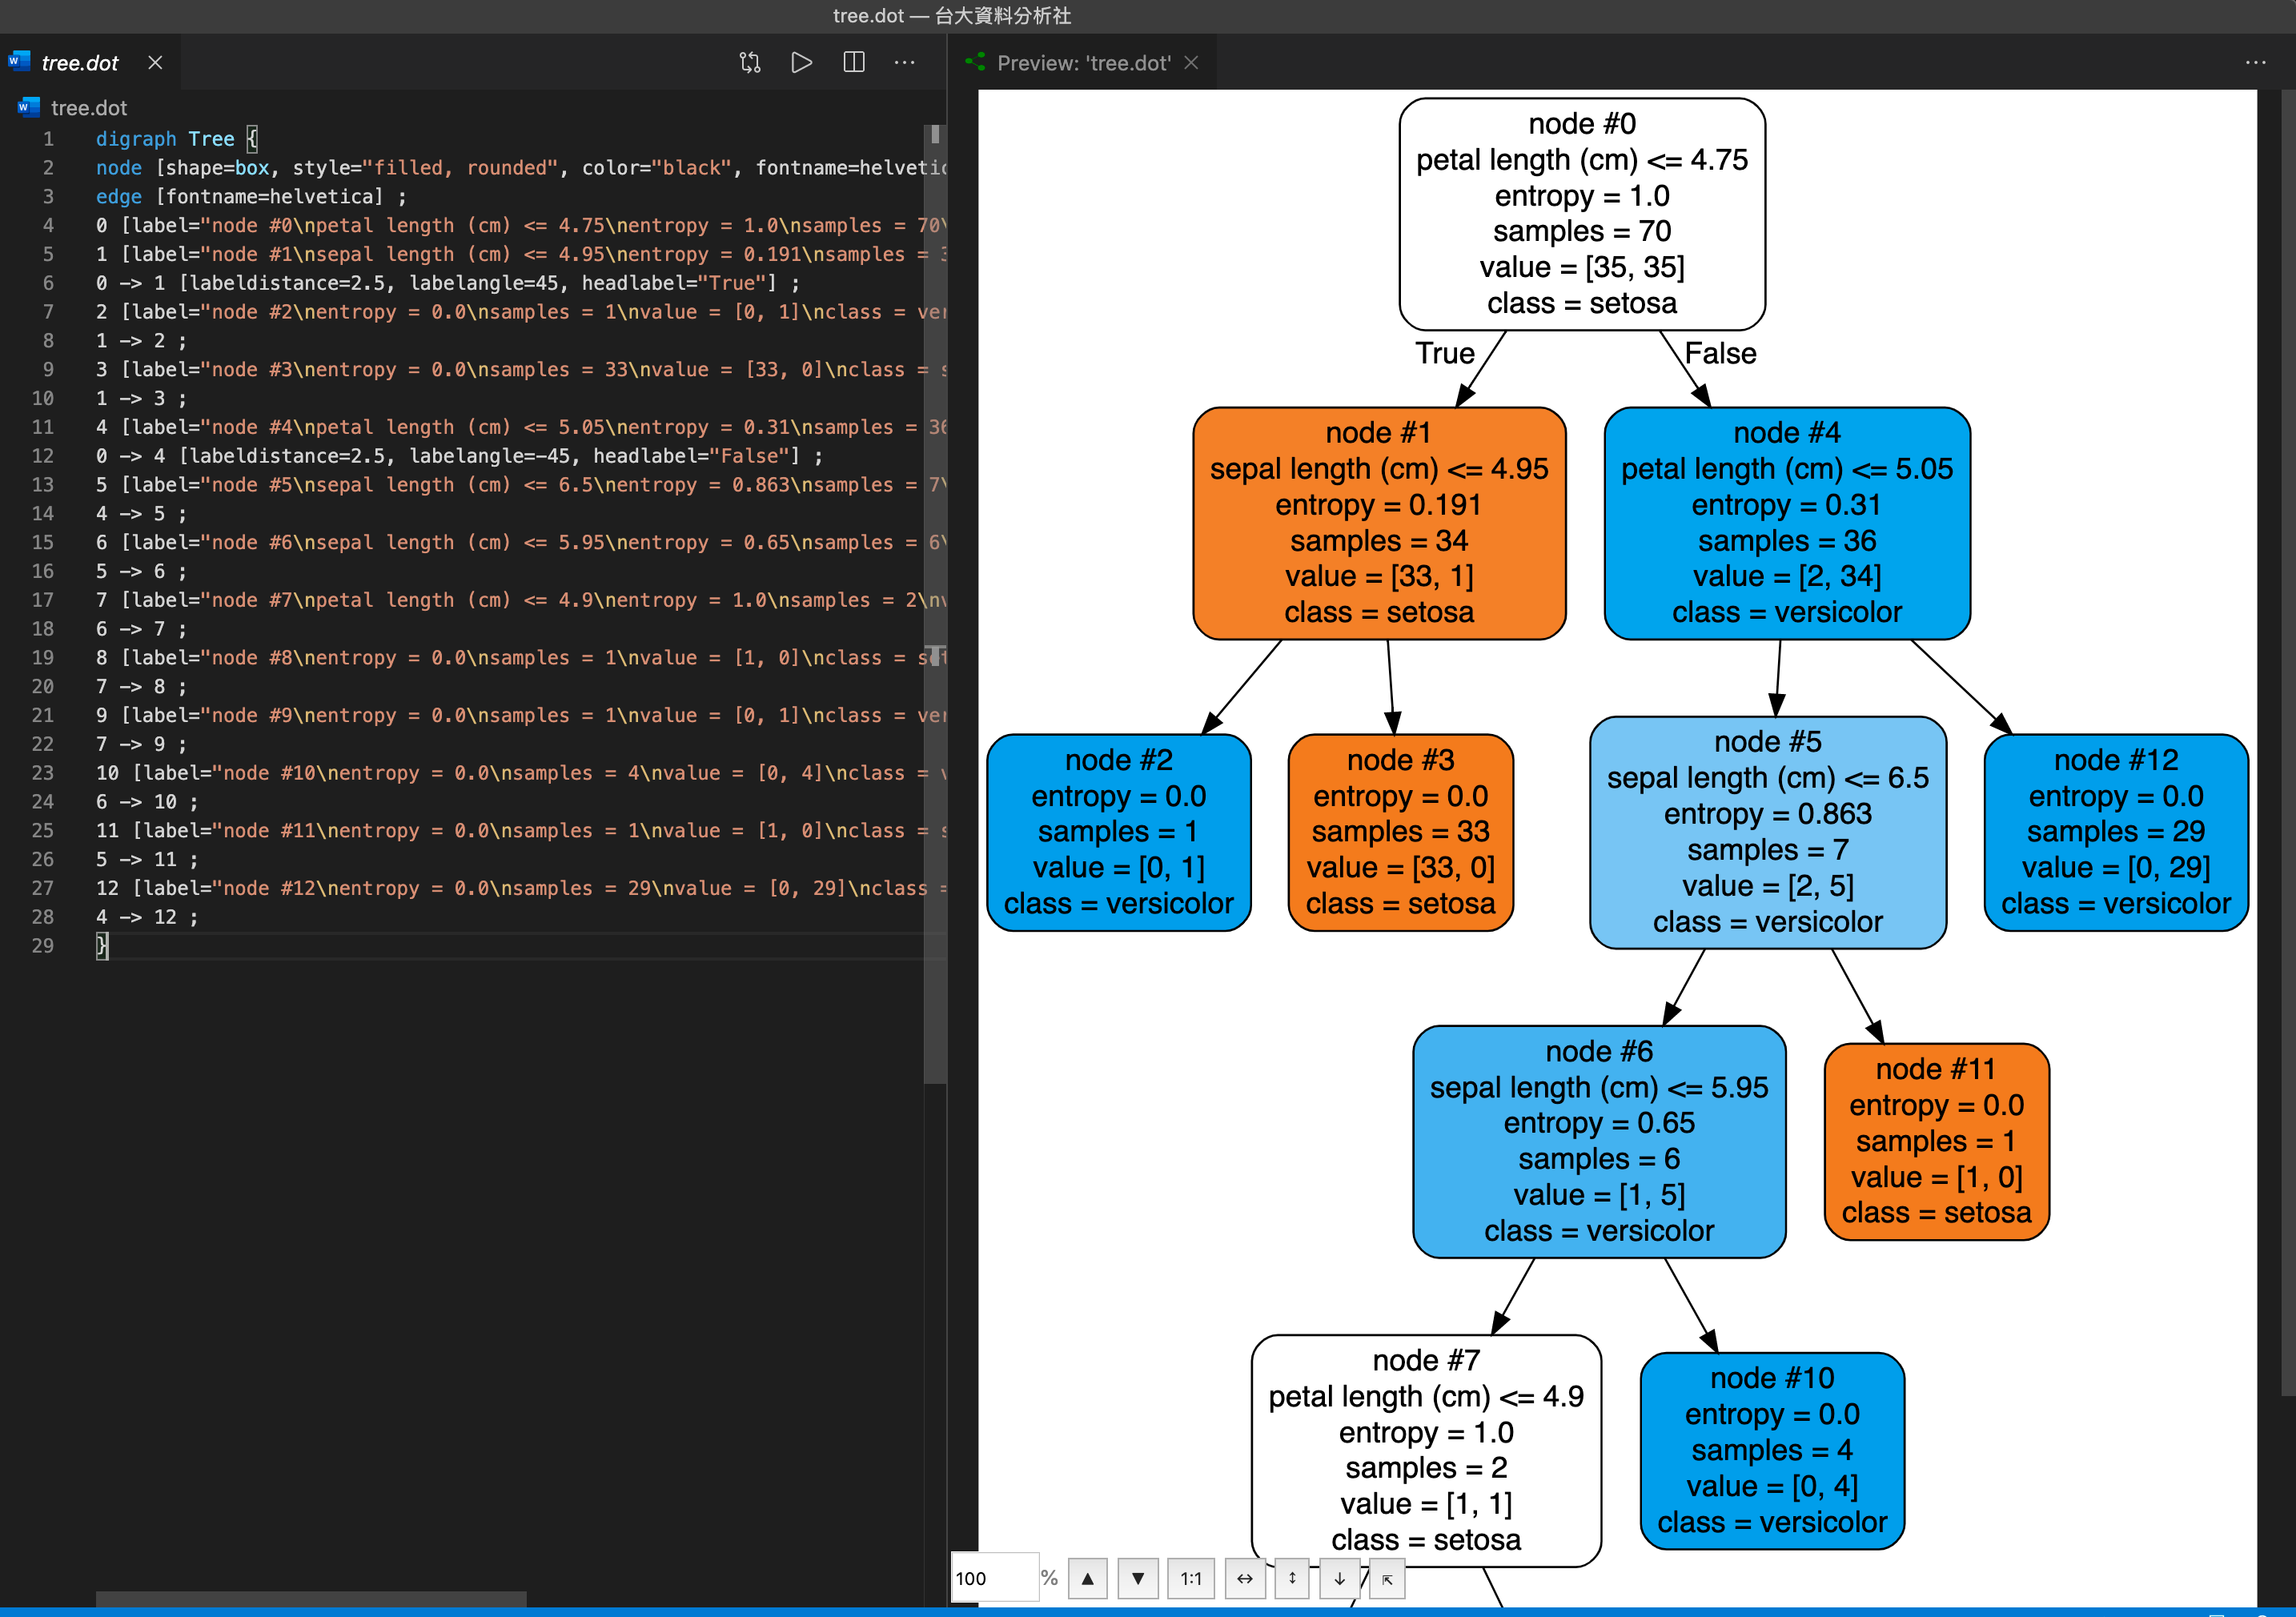